In [ ]:
# 정리 해야 할 것
"""
requrienment.txt
test 를 train 에 합칠지 말지
test_.csv 도 자동으로 해야 할 것인가. 왜냐면 내가 그냥 넣었거든
pretrain model 파일 저장 아직
import glob from glob 하면 충돌하는게 있다.
"""

# 데이터 전처리

## 데이터 다운로드

In [ ]:
import os
from zipfile import ZipFile
from glob import glob 
import pandas as pd 

# 포디 데이터 다운로드
!gdown "1LmtwbBi_Vw8OoOcUzqddYBwZc_W5kpQU&confirm=t" 

# pretrained model 다운로드
!gdown "1mOWGMMkrOHynDGtHsYQmpaCSKwUfB6gB&confirm=t" 

# 현욱 깃헙에서 .py 파일 다운로드
!git clone https://github.com/ugiugi0823/DACON-4D.git

# 배경 제거한 데이터 셋 다운
!gdown "11gM32erRmxLNWSq4EK2P2fOmQgGIe9YG&confirm=t"


# 필요한 설치 하기!
!pip install efficientnet-pytorch
!pip install warmup-scheduler
!pip install Augmentor
!pip install rembg[gpu]
!pip install ttach




dir = '/content/'

# 실제로 알집이 풀어질 경로
base_dir = '/content/DACON-4D/dataset/'
base_dir_1 = '/content/DACON-4D/'

# os.chdir(base_dir)

# 알집을 풀어볼까용?
ZipFile(dir + '4d_data.zip').extractall(base_dir)
ZipFile(dir + 'train_sub_bgr.zip').extractall(base_dir)
ZipFile(dir + 'pretrained_model.zip').extractall(base_dir_1)


# 실제로 잘 풀렸는지 확인

os.listdir(base_dir)


Downloading...
From: https://drive.google.com/uc?id=1LmtwbBi_Vw8OoOcUzqddYBwZc_W5kpQU&confirm=t
To: /content/4d_data.zip
100% 754M/754M [00:04<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mOWGMMkrOHynDGtHsYQmpaCSKwUfB6gB&confirm=t
To: /content/pretrained_model.zip
100% 207M/207M [00:00<00:00, 230MB/s]
fatal: destination path 'DACON-4D' already exists and is not an empty directory.
Downloading...
From: https://drive.google.com/uc?id=11gM32erRmxLNWSq4EK2P2fOmQgGIe9YG&confirm=t
To: /content/train_sub_bgr.zip
100% 2.14G/2.14G [00:13<00:00, 156MB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://p

['train',
 'train.csv',
 'test',
 'test.csv',
 'sample_submission.csv',
 'train_new',
 'train_sub_bgr',
 '__init__.py',
 'background']

In [ ]:

# import os
# os.kill(os.getpid(), 9)

## 만약에 배경이미지를 제거 하고 싶다면!
- Remove images background using by rembg[gpu]
- [What is rembg](https://github.com/danielgatis/rembg)

In [ ]:
%cd /content/DACON-4D/dataset

In [ ]:
!pip install rembg[gpu]

In [ ]:
# !rembg p inpupt_path output_path 
'''
It takes a long time.!!
'''

!rembg p train train_new

## 내가 찍은 사진과 포디블록 합치는 구간!

In [ ]:
%cd /content/DACON-4D/dataset

/content/DACON-4D/dataset


In [ ]:
from glob import glob 

img_paths = glob("train_sub_bgr/*.png")
bgr_paths = glob("background/*.jpg")

print(f"샘플수 :{len(img_paths)}")
print(f"샘플수 :{len(bgr_paths)}")

샘플수 :32994
샘플수 :1


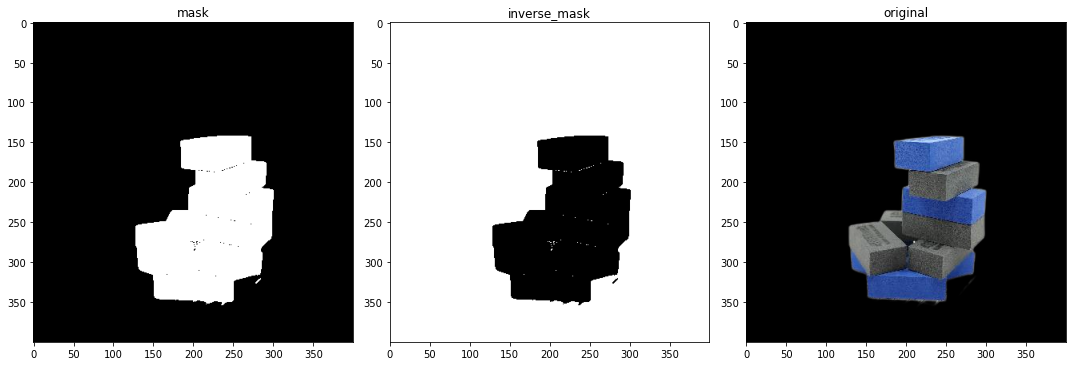

In [ ]:
import matplotlib.pyplot as plt
import os 
from glob import glob 
import cv2
import random 

img_path =img_paths[3]
img  =cv2.imread(img_path)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)


mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv = cv2.bitwise_not(mask) #cv랑 pyplot은 색깔 포맷이 다름 

plt.figure( figsize= (15,15))
plt.subplot(131)
plt.imshow(mask)
plt.title("mask")
plt.subplot(132)
plt.imshow(mask_inv)
plt.title("inverse_mask")
plt.subplot(133)
plt.imshow(img)
plt.title("original")
plt.tight_layout()

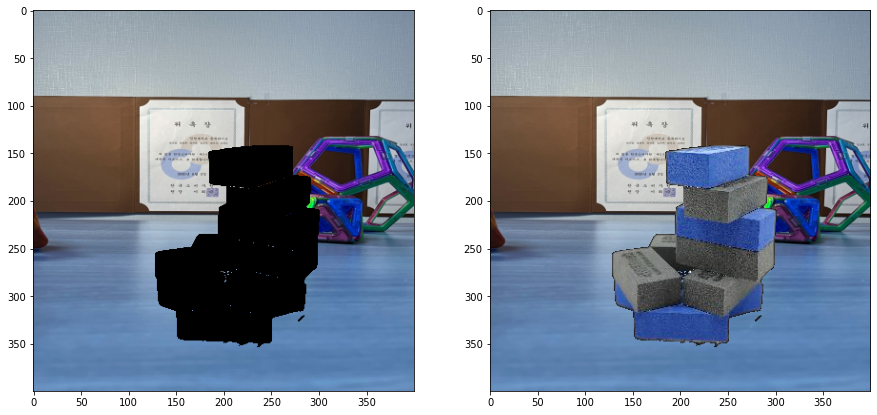

In [ ]:
bgr1 =cv2.imread(bgr_paths[0],1)
bgr1 = cv2.resize(bgr1, (400,400), interpolation = cv2.INTER_AREA )



bgr_masked =cv2.bitwise_and(bgr1,mask_inv)

dst =cv2.bitwise_or(img, bgr_masked)
plt.figure( figsize= (15,15))
plt.subplot(121)
plt.imshow(bgr_masked)
plt.subplot(122) 
plt.imshow(cv2.bitwise_or(dst,img))

In [ ]:
save_dir ="train_new"
def get_bgr(img_path, bgr_path, save_dir):
    
    img  =cv2.imread(img_path)
    bgr = cv2.imread(bgr_path)
    bgr = cv2.resize(bgr, (400,400), interpolation = cv2.INTER_AREA )

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)
    mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    mask_inv = cv2.bitwise_not(mask) 

    bgr_masked =cv2.bitwise_and(bgr,mask_inv)
    dst =cv2.bitwise_or(img, bgr_masked)
    result = cv2.bitwise_or(dst,img)

    cv2.imwrite(save_dir +"/"+ img_path.split("/")[-1].split(".")[0]+".jpg", result)

In [ ]:
from tqdm.auto import tqdm

for img_path in tqdm(img_paths): 
    for bgr_path in bgr_paths:
       get_bgr(img_path, bgr_path, save_dir)

  0%|          | 0/32994 [00:00<?, ?it/s]

In [ ]:
from glob import glob 

img_paths = glob("train_sub_bgr/*.png")
bgr_paths = glob("background/*.jpg")
new_paths = glob("train_new/*.jpg")

print(f"샘플수 :{len(img_paths)}")
print(f"샘플수 :{len(bgr_paths)}")
print(f"샘플수 :{len(new_paths)}")

샘플수 :32994
샘플수 :1
샘플수 :32994


In [ ]:
new_paths[0]

'train_new/TRAIN_23797.jpg'

## test set 이름 변경

In [ ]:
%cd /content/DACON-4D/dataset/test

/content/DACON-4D/dataset/test


In [ ]:
import glob
input_list_test = glob.glob("./*.jpg")
input_list_test[0]

'./TEST_01166.jpg'

In [ ]:

t = glob.glob("./*.jpg")
t = t[0]
t = t.split('_')[1].split('.')[0]

print(t)
# print(type(t))
# int(t)

01166


In [ ]:


# 무조건 해당 경로에서 진행해야 해!
%cd /content/DACON-4D/dataset/test
for i, file in enumerate(input_list_test):
    old = file
    ind = file.split('_')[1].split('.')[0]
    new = ind +".jpg" # 00000 + .jpg >> 요기서 
    print(old +'==>' + new)
    os.rename(old,new)

/content/DACON-4D/dataset/test
./TEST_01166.jpg==>01166.jpg
./TEST_00836.jpg==>00836.jpg
./TEST_01245.jpg==>01245.jpg
./TEST_00944.jpg==>00944.jpg
./TEST_00046.jpg==>00046.jpg
./TEST_00481.jpg==>00481.jpg
./TEST_00128.jpg==>00128.jpg
./TEST_01354.jpg==>01354.jpg
./TEST_01046.jpg==>01046.jpg
./TEST_01269.jpg==>01269.jpg
./TEST_00362.jpg==>00362.jpg
./TEST_00466.jpg==>00466.jpg
./TEST_00961.jpg==>00961.jpg
./TEST_00374.jpg==>00374.jpg
./TEST_00228.jpg==>00228.jpg
./TEST_00868.jpg==>00868.jpg
./TEST_00883.jpg==>00883.jpg
./TEST_01436.jpg==>01436.jpg
./TEST_01322.jpg==>01322.jpg
./TEST_00225.jpg==>00225.jpg
./TEST_00501.jpg==>00501.jpg
./TEST_00990.jpg==>00990.jpg
./TEST_00772.jpg==>00772.jpg
./TEST_00889.jpg==>00889.jpg
./TEST_01034.jpg==>01034.jpg
./TEST_00259.jpg==>00259.jpg
./TEST_00751.jpg==>00751.jpg
./TEST_00555.jpg==>00555.jpg
./TEST_01125.jpg==>01125.jpg
./TEST_01358.jpg==>01358.jpg
./TEST_00842.jpg==>00842.jpg
./TEST_01112.jpg==>01112.jpg
./TEST_00490.jpg==>00490.jpg
./TEST_01260

## train 이름 변경

In [ ]:
%cd /content/DACON-4D/dataset/train_new

/content/DACON-4D/dataset/train_new


In [ ]:
t = glob.glob("./*.jpg")
t = t[0]
t = t.split('_')[1].split('.')[0]

print(t)
# print(type(t))
# int(t)

23797


In [ ]:
# 무조건 해당 경로에서 진행해야 해!
t_train = glob.glob("./T*.jpg")

%cd /content/DACON-4D/dataset/train_new
for i, file in enumerate(t_train):
    old = file
    ind = file.split('_')[1].split(".")[0]
    new = ind +".jpg" # 00000 + .jpg >> 요기서 
    print(old +'==>' + new)
    os.rename(old,new)

## 원본 데이터만 활용한 df 버전

In [ ]:
%cd /content/DACON-4D/dataset

/content/DACON-4D/dataset


In [ ]:
df= pd.read_csv("train.csv")
df['id'] = df['id'].apply(lambda x:x.replace('TRAIN_', ''))
df = df.drop('img_path', axis=1)
df = df.drop('id', axis=1)

df
df.to_csv("train_new.csv")

# 실제 학습과 테스트 동시 진행하는 코너~

## Train

In [ ]:
%cd /content/DACON-4D

/content/DACON-4D


In [ ]:
import gc
gc.collect()

0

In [ ]:
import torch 
torch.cuda.empty_cache()

In [ ]:
### Train ###
CMD = "python main.py "\
      "--mode train "\
      "--model_index 1 "\
      "--batch_size 32 "\
      "--epochs 10 "\
      "--learning_rate 0.0029 "\
      "--patience 8 "\
      "--seed 42 "\
      "--data_type original "\
      "--base_model resnet50 "\
      "--threshold 0.5 "\
      "--fold_k 1"
!{CMD}


2023-01-30 04:50:07,859 : START
2023-01-30 04:50:08,473 : Global Device: cuda:0
2023-01-30 04:50:08,473 : Parsed Args: Namespace(base_dir='/content/DACON-4D', base_model='resnet50', batch_size=32, ckpt_path='/content/DACON-4D/ckpt', cuda=True, data_type='original', device_index=0, epochs=10, fold_k=1, learning_rate=0.0029, mode='train', model_index=1, patience=8, pretrained=False, pretrained_weights_dir='/content/pretrained_model', seed=42, threshold=0.5, tta=False, val_ratio=0.2, verbose=100, voting='soft')
2023-01-30 04:50:08,486 : Data used: train: dataset/train_new, test: dataset/test
2023-01-30 04:50:16,592 : Trainset length: 26395, Valset length: 6599
2023-01-30 04:50:16,953 : Not using pretrained model.
2023-01-30 04:50:18,778 : Training on Fold (1/1)
2023-01-30 04:50:18,843 : 
---------------------------------------------------------------------------
    TRAINING INFO
        Loss function : MultiLabelSoftMarginLoss()
        Optimizer     : Adam (
Parameter Group 0
    amsgra

#### ckpt 관련 오류면 아래 한번 실행 해주세요!

₩"Model checkpoint folder already exists."
AssertionError: Model checkpoint folder already exists.

In [ ]:
# !rm -r ckpt
# !rm -r /content/ckpt/model_1

In [ ]:
"""
try 
- 1st 참고해서 inference 다시만들고 앙상블 시키기
- model_6 돌리는걸 가지고, 그냥 하나 가지고 베이스 코드 참고하고 돌려보기

model_5 = 32994 data 로
model_6 = 32994 data 인데, 여기서 fold 1 epoch 100
"""

## Test

In [ ]:
%cd /content/DACON-4D

/content/DACON-4D


In [ ]:
CMD = "python inference.py "\
           " --batch_size 32 "\
           " --weight_path /content/DACON-4D/ckpt/model_1/"
!{CMD}

[info msg] arguments
image_path : ./dataset/test/
sub_path : ./dataset/sample_submission.csv
label_path : ./dataset/test_.csv
weight_path : /content/DACON-4D/ckpt/model_1/
out_path : /content/
model : resnet50
batch_size : 32
device : cuda:0
[info msg] weight /content/DACON-4D/ckpt/model_1/early_stopped_fold1.pth is loaded
[info msg] inference start
100% 46/46 [00:24<00:00,  1.91it/s]
[info msg] submission fils is saved to /content/01300535_ensemble_submission.csv
